In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import japanize_matplotlib

In [9]:
with open('t10k-images-idx3-ubyte', 'rb') as f:
    print(f.read())

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [42]:
df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
df.shape

(60000, 785)

In [4]:
test_df.shape

(10000, 785)

In [5]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


・Labels

0 Tシャツ/上着  
1 パンツ  
2 プルオーバー  
3 ワンピース  
4 コート  
5 サンダル  
6 シャツ  
7 スニーカー  
8 バッグ  
9 アンクルブーツ  

・TL;DR

各行は個別の画像です  
列 1 はクラス ラベルです。  
残りの列はピクセル番号 (合計 784) です。  
各値はピクセルの濃さ (1 ～ 255)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [43]:
X_train = df.drop('label', axis=1)
y_train = df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

In [47]:
single_image = X_train.iloc[0]

In [50]:
number = single_image.to_numpy().reshape(28, 28)

In [51]:
number

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   4,   0,   0,   0,   0,   0,  62,  61,  21,
         29,  23,  51, 136,  61,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  88, 201, 228, 225, 255, 115,
         62, 137, 255, 235, 222, 255, 135,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  47, 252, 234, 238, 224, 215, 215, 229,
        108, 180, 207, 214, 224, 231, 249, 254,  45,   0,   0,   0,   0,
          0,   0],
       [  

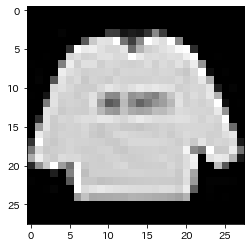

In [53]:
plt.imshow(number, cmap='gray') # cmapで色変更可能 gray magma

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [55]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [56]:
scaled_X_train

array([[-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       ...,
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557],
       [-0.00950488, -0.02269303, -0.02890692, ..., -0.15825831,
        -0.09143181, -0.03304557]])

In [57]:
from sklearn.decomposition import PCA

In [58]:
pca_model = PCA(n_components=2)

In [59]:
pca_X_train = pca_model.fit_transform(scaled_X_train)
pca_X_test = pca_model.transform(scaled_X_test)

In [60]:
np.sum(pca_model.explained_variance_ratio_)

0.3645273855029687

In [61]:
pca_X_train[:, 0]

array([ 10.66497292, -11.98974762,  20.51767123, ...,   7.14876699,
         4.43415256,  -9.10680985])

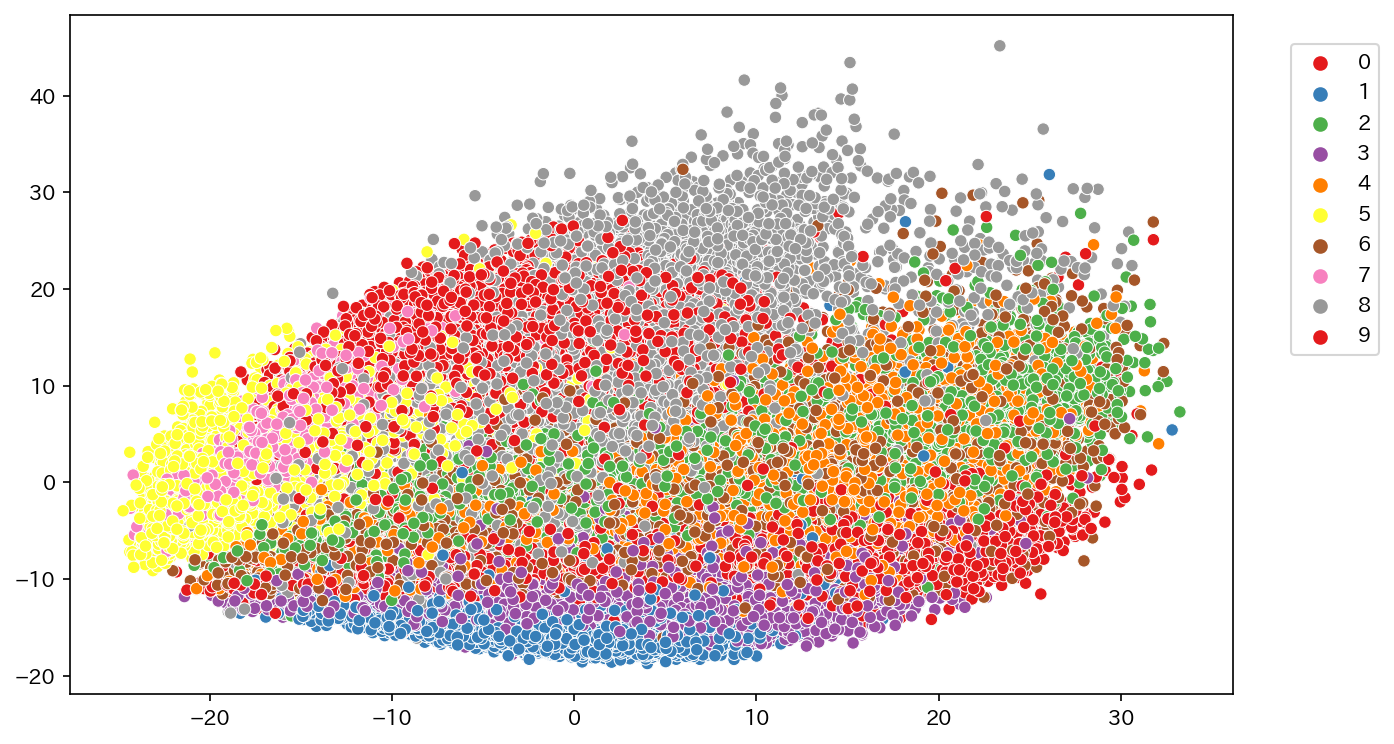

In [66]:
plt.figure(figsize=(10, 6), dpi=150)
sns.scatterplot(pca_X_train[:, 0], pca_X_train[:, 1], hue=y_train.values, palette='Set1')
plt.legend(loc=(1.05, 0.5))

In [9]:
fashion_map = {0: 'Tシャツ/上着', 1: 'パンツ', 2: 'プルオーバー',
               3: 'ワンピース', 4: 'コート', 5: 'サンダル', 6: 'シャツ', 
               7: 'スニーカー', 8: 'バッグ', 9: 'アンクルブーツ'}

In [10]:
df['label'] = df['label'].map(fashion_map)
test_df['label'] = test_df['label'].map(fashion_map)

In [11]:
df.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,14.488767,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,38.334549,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [12]:
df['label'].value_counts()

プルオーバー     6000
アンクルブーツ    6000
シャツ        6000
Tシャツ/上着    6000
ワンピース      6000
コート        6000
サンダル       6000
バッグ        6000
スニーカー      6000
パンツ        6000
Name: label, dtype: int64

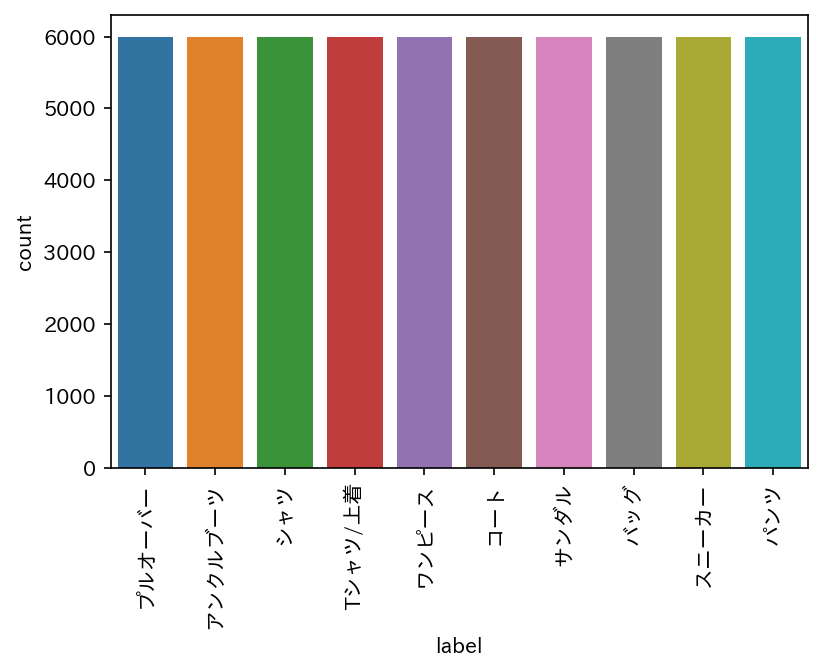

In [13]:
plt.figure(dpi=150)
sns.countplot(x='label', data=df)
plt.xticks(rotation=90); # ;付けないと情報が出る

In [14]:
# from sklearn.model_selection import train_test_split

In [32]:
pca_model = PCA(n_components=10)

In [36]:
pca_X_train = pca_model.fit_transform(scaled_X_train)

In [37]:
pca_X_test = pca_model.transform(scaled_X_test)

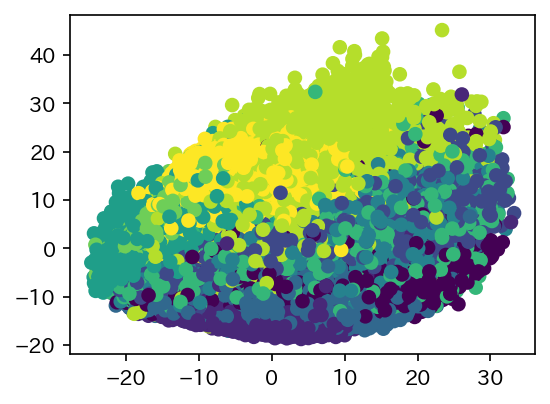

In [44]:
plt.figure(figsize=(4, 3), dpi=150)
plt.scatter(pca_X_train[:, 0], pca_X_train[:, 1], c=y_train)

In [45]:
df_comp = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 
                                                    'PC6', 'PC7', 'PC8', 'PC9', 'PC10'], 
                       columns=X_train.columns)

In [46]:
df_comp

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
PC1,0.000314,0.000881,0.001493,0.002551,0.003252,0.004584,0.005629,0.008702,0.013109,0.017720,...,0.027027,0.025182,0.021149,0.022186,0.027258,0.027034,0.018609,0.006491,0.001466,0.000668
PC2,0.000179,0.001450,0.001159,0.002326,0.003010,0.003129,0.001624,-0.001113,-0.006125,-0.019045,...,-0.036600,-0.020086,-0.009848,0.002714,0.012323,0.017517,0.017963,0.014083,0.009616,0.004091
PC3,0.000115,0.000860,0.001887,0.003749,0.004919,0.006317,0.010014,0.013645,0.015235,0.009331,...,-0.018212,-0.000005,0.011793,0.045376,0.069914,0.065262,0.041154,0.008940,-0.002325,-0.001244
PC4,0.001246,0.005164,0.006109,0.010080,0.012416,0.014035,0.015059,0.017428,0.019019,0.017239,...,0.016519,0.025133,0.029309,0.010123,0.001832,0.010784,0.027623,0.039489,0.032530,0.011780
PC5,0.002853,0.008815,0.013708,0.020186,0.024924,0.026296,0.028038,0.033015,0.038872,0.038065,...,0.032721,0.038812,0.034952,-0.023378,-0.055883,-0.044235,-0.017302,0.002107,0.001306,0.002758
PC6,-0.000141,-0.000040,-0.000263,-0.002325,-0.003101,-0.002927,-0.000206,0.006279,0.007637,-0.003934,...,0.080079,0.098676,0.094458,0.043070,-0.019009,-0.040485,-0.032164,-0.006552,0.002524,0.003586
PC7,0.001865,0.004143,0.001512,-0.000385,0.000125,-0.004500,-0.012867,-0.026075,-0.037995,-0.032317,...,-0.013369,-0.032917,-0.031987,-0.000761,0.013975,0.018903,0.024979,0.029698,0.027316,0.016834
PC8,0.001227,0.001708,0.004465,0.016139,0.024283,0.028739,0.028353,0.027285,0.026844,0.027072,...,-0.000485,-0.000558,0.001141,-0.013362,0.005129,0.044484,0.077814,0.081510,0.058652,0.024700
PC9,0.007253,0.015511,0.020273,0.040417,0.043137,0.037400,0.028165,0.015255,-0.003720,-0.029996,...,-0.032240,-0.025553,-0.009258,0.052848,0.032864,-0.022166,-0.052569,-0.025271,0.002513,-0.000097
PC10,0.005753,0.021995,0.035692,0.081378,0.099272,0.102130,0.105122,0.106009,0.101824,0.093393,...,0.028300,0.020429,0.037205,0.060151,0.037695,0.017170,0.006196,0.001467,-0.008936,-0.006039


In [18]:
from sklearn.ensemble import GradientBoostingClassifier

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
model = GradientBoostingClassifier() # (n_estimators=300, random_state=42)

In [21]:
# model.get_params().keys()

In [22]:
model.fit(scaled_X_train, y_train)

GradientBoostingClassifier()

In [23]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [24]:
y_pred = model.predict(scaled_X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.879

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Tシャツ/上着       0.81      0.83      0.82      1000
     アンクルブーツ       0.94      0.95      0.94      1000
         コート       0.81      0.83      0.82      1000
        サンダル       0.98      0.95      0.96      1000
         シャツ       0.71      0.64      0.67      1000
       スニーカー       0.92      0.94      0.93      1000
         バッグ       0.95      0.96      0.96      1000
         パンツ       0.98      0.98      0.98      1000
      プルオーバー       0.81      0.79      0.80      1000
       ワンピース       0.88      0.91      0.90      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [27]:
model.feature_importances_

array([2.26592085e-06, 7.80598516e-05, 1.96516413e-05, 1.41547242e-04,
       1.34447812e-04, 2.44925903e-04, 2.47207562e-04, 4.07553653e-04,
       2.85538280e-04, 2.11198945e-04, 4.24332728e-03, 1.18838827e-03,
       6.10492837e-04, 8.80746493e-03, 7.30701097e-03, 2.79073211e-04,
       1.90812185e-04, 5.07717988e-03, 5.46449947e-04, 1.78637216e-04,
       1.62205102e-04, 1.06220758e-04, 4.38868471e-05, 2.55549799e-05,
       1.05870085e-05, 8.68872607e-06, 6.80634559e-06, 5.96853746e-06,
       1.12976250e-05, 2.74333196e-06, 1.99590792e-05, 3.77712904e-05,
       1.88095492e-04, 2.48935033e-04, 4.84945749e-04, 1.37798427e-03,
       2.52054300e-03, 1.87492047e-02, 5.54596209e-03, 2.48259635e-02,
       1.13158282e-03, 4.54713887e-04, 3.76724688e-03, 6.71689603e-04,
       4.85355376e-04, 1.56415893e-03, 5.17721011e-03, 5.96066360e-04,
       2.73894142e-03, 3.08062295e-04, 1.50552614e-04, 6.00734303e-04,
       3.04245292e-05, 1.06261358e-05, 0.00000000e+00, 5.95277128e-06,
      

In [28]:
X_train.columns

Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)

In [29]:
pd.DataFrame(index=X_train.columns, columns=['feature importance'],
             data=model.feature_importances_).sort_values('feature importance')

,feature importance
pixel453,0.000000
pixel783,0.000000
pixel492,0.000000
pixel377,0.000000
pixel236,0.000000
...,...
pixel40,0.024826
pixel338,0.030860
pixel628,0.034126
pixel347,0.043194


In [30]:
# plt.figure(figsize=(12, 8), dpi=200)
# plot_tree(model, feature_names=X_train.columns, filled=True);